In [ ]:
%tensorflow_version 2.x 

In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt 

pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

In [4]:
# read in the csv file
train_df = pd.read_csv(filepath_or_buffer="https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv")

# scale the median house values by 1000
train_df["median_house_value"] /= 1000.0

# show the first 5 rows of the dataset
train_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.3,34.2,15.0,5612.0,1283.0,1015.0,472.0,1.5,66.9
1,-114.5,34.4,19.0,7650.0,1901.0,1129.0,463.0,1.8,80.1
2,-114.6,33.7,17.0,720.0,174.0,333.0,117.0,1.7,85.7
3,-114.6,33.6,14.0,1501.0,337.0,515.0,226.0,3.2,73.4
4,-114.6,33.6,20.0,1454.0,326.0,624.0,262.0,1.9,65.5


In [5]:
# outputs a description of the dataset
train_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0
mean,-119.6,35.6,28.6,2643.7,539.4,1429.6,501.2,3.9,207.3
std,2.0,2.1,12.6,2179.9,421.5,1147.9,384.5,1.9,116.0
min,-124.3,32.5,1.0,2.0,1.0,3.0,1.0,0.5,15.0
25%,-121.8,33.9,18.0,1462.0,297.0,790.0,282.0,2.6,119.4
50%,-118.5,34.2,29.0,2127.0,434.0,1167.0,409.0,3.5,180.4
75%,-118.0,37.7,37.0,3151.2,648.2,1721.0,605.2,4.8,265.0
max,-114.3,42.0,52.0,37937.0,6445.0,35682.0,6082.0,15.0,500.0


In [6]:
def build_model(learning_rate):
  
  model = tf.keras.models.Sequential()
  # Topography of the model, so in this case a single node in a single layer
  model.add(tf.keras.layers.Dense(units=1,
                                  input_shape=(1,)))
  # Compiling the model into code, which tensorflow can efficiently execute 
  model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])
  return model

def train_model(model, df, feature, label, epochs, batch_size):
  
  # feed the model the feature and label 
  history = model.fit(x=df[feature],
                      y=df[label],
                      batch_size=batch_size,
                      epochs=epochs)
  
  # Gathering the weights and the bias the model predicted in its training
  trained_weight = model.get_weights()[0]
  trained_bias = model.get_weights()[1]

  # list of epochs is stored seperately 
  epochs = history.epoch

  # isolating the error of each epoch
  hist = pd.DataFrame(history.history)

  # snapshot of the root mean squared error each epoch
  rmse = hist["root_mean_squared_error"]

  return trained_weight, trained_bias, epochs, rmse

print("Defined the build model and the train model functions")

Defined the build model and the train model functions


In [7]:
def model_plot(trained_weight, trained_bias, feature, label):

  # label axes
  plt.xlabel(feature)
  plt.ylabel(label)

  # scatter plot of 200 random samples from the dataset
  random_examples = train_df.sample(n=200)
  plt.scatter(random_examples[feature], random_examples[label])

  # red line representing the trained model
  x0 = 0
  y0 = trained_bias
  x1 = 10000
  y1 = trained_bias + (trained_weight * x1)
  plt.plot([x0, x1], [y0, y1], c="r")

  # does what it says
  plt.show()

def loss_curve_plot(epochs, rmse):

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs, rmse, label="loss")
  plt.legend()
  plt.ylim([rmse.min()*0.97, rmse.max()])
  plt.show()

print("Defined the mode plot and the loss curve plot functions")

Defined the mode plot and the loss curve plot functions


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Epoch 1/24
567/567 [==============================] - 1s 1ms/step - loss: 39317.8672 - root_mean_squared_error: 198.2873
Epoch 2/24
567/567 [==============================] - 1s 1ms/step - loss: 19368.0508 - root_mean_squared_error: 139.1691
Epoch 3/24
567/567 [==============================] - 1s 1ms/step - loss: 15054.1514 - root_mean_squared_error: 122.6954
Epoch 4/24
567/567 [==============================] - 1s 1ms/step - loss: 14687.7002 - root_mean_squared_error: 121.1928
Epoch 5/24
567/567 [==============================] - 1s 1ms/step - loss: 14499.1875 - root_mean_squared_error: 120.4126
Epoch 6/24
567/567 [==============================] - 1s 1ms/step - loss: 14371.4971 - root_mean_squared_error: 119.8812
Epoch 7/24
567/567 [==============================] - 1s 1ms/step - loss: 14229.0059 - root_mean_squared_error: 119.2854
Epoch 8/24
567/567 [==============================] - 1s 1ms/step - loss: 14096.6387 - root_mean_squared_error: 118.7293
Epoch 9/24
567/567 [============

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


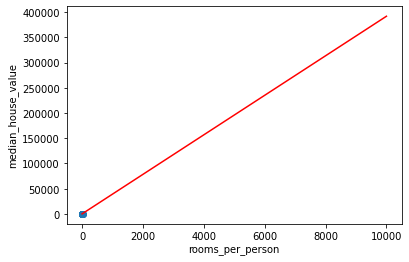

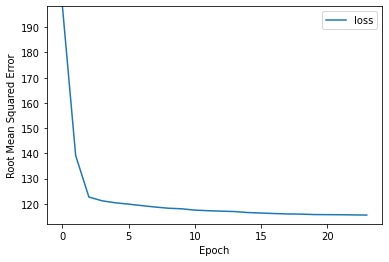

In [8]:
train_df["rooms_per_person"] = train_df["total_rooms"]/train_df["population"]

# Hyperparameters
learning_rate = 0.06
epochs = 24
batch_size = 30

# creating a model, which predicts the house value based on the number of total rooms in the house
my_feature = "rooms_per_person"
my_label = "median_house_value"

# every pre-existing version of the model gets deleted
my_model = None

# invoking the function
my_model = build_model(learning_rate=learning_rate)
weight, bias, epochs, rmse = train_model(my_model, train_df, my_feature, my_label, epochs, batch_size)

print("Learned weight value is: %.4f" %weight)
print("Learned bias value is: %.4f" %bias)

model_plot(weight, bias, my_feature, my_label)
loss_curve_plot(epochs, rmse)

In [22]:
# prediction function
def predict_house_value(n, feature, label):

  # defining a batch of data with given size n
  batch = train_df[feature][10000:10000+n]
  # the model now predicts the labels for the batch
  predicted_values = my_model.predict_on_batch(x=batch)

  # printing out the predictions versus the real labels
  print("feature   label          predicted")
  print("  value   value          value")
  print("          in thousand$   in thousand$")
  print("--------------------------------------")
  for i in range(n):
    print("%5.0f %6.0f %15.0f" % (train_df[feature][10000+i],
                                  train_df[label][10000+i],
                                  predicted_values[i][0]))
    
print("Defined prediction function")

Defined prediction function


In [10]:
# predicting house values for a set of 14 houses, passing in the feature which the model is trained for
predict_house_value(14, my_feature, my_label)

feature   label          predicted
  value   value          value
          in thousand$   in thousand$
--------------------------------------
    2     53             190
    2     92             202
    2     69             196
    2     62             213
    1     80             188
    2    295             226
    2    500             212
    2    342             224
    4    118             289
    2    128             215
    2    187             225
    3     80             236
    2    112             226
    2     95             220


In [11]:
# correlation matrix for the dataset
train_df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_person
longitude,1.0,-0.9,-0.1,0.0,0.1,0.1,0.1,-0.0,-0.0,-0.1
latitude,-0.9,1.0,0.0,-0.0,-0.1,-0.1,-0.1,-0.1,-0.1,0.1
housing_median_age,-0.1,0.0,1.0,-0.4,-0.3,-0.3,-0.3,-0.1,0.1,-0.1
total_rooms,0.0,-0.0,-0.4,1.0,0.9,0.9,0.9,0.2,0.1,0.1
total_bedrooms,0.1,-0.1,-0.3,0.9,1.0,0.9,1.0,-0.0,0.0,0.0
population,0.1,-0.1,-0.3,0.9,0.9,1.0,0.9,-0.0,-0.0,-0.1
households,0.1,-0.1,-0.3,0.9,1.0,0.9,1.0,0.0,0.1,-0.0
median_income,-0.0,-0.1,-0.1,0.2,-0.0,-0.0,0.0,1.0,0.7,0.2
median_house_value,-0.0,-0.1,0.1,0.1,0.0,-0.0,0.1,0.7,1.0,0.2
rooms_per_person,-0.1,0.1,-0.1,0.1,0.0,-0.1,-0.0,0.2,0.2,1.0


In [12]:
# processing the correlation matrix for the code in the next steps
corr_mat_train = train_df.corr()
temp_list = corr_mat_train
temp = list(np.ravel(temp_list))
corr_mat_train = np.ravel(corr_mat_train)
corr_mat_train = list(corr_mat_train)
print(temp)

[1.0, -0.9252082786792203, -0.11425030616319004, 0.04701044032857264, 0.07180195592383552, 0.10167426456842366, 0.05962770420907765, -0.015484961384792459, -0.044981696510914604, -0.07777342300040109, -0.9252082786792203, 1.0, 0.01645390309503686, -0.03877257416486656, -0.06937291517634868, -0.11126136149822294, -0.07490229668637594, -0.08030301379233765, -0.1449167173376309, 0.14301743456372965, -0.11425030616319004, 0.01645390309503686, 1.0, -0.360984165725288, -0.3204340826318292, -0.29588980535868376, -0.3027541911750376, -0.11593162461581463, 0.1067577070728769, -0.10365471347468519, 0.04701044032857264, -0.03877257416486656, -0.360984165725288, 1.0, 0.9284029878168449, 0.8601703408101914, 0.9190182976946627, 0.19538280739464678, 0.13099146625326727, 0.12100105247324228, 0.07180195592383552, -0.06937291517634868, -0.3204340826318292, 0.9284029878168449, 1.0, 0.8811685743741047, 0.9809200924180838, -0.013494682320926026, 0.04578305197954568, 0.047811224744948165, 0.1016742645684236

In [18]:
# removing the values which have the two same features
for val in corr_mat_train:
  if temp.index(val)/11 == 0 or temp.index(val) == 0:
    corr_mat_train.remove(val)

# finding out which of the values in the correlation matrix is the greatest
max_value = max(corr_mat_train)
max_value

0.9809200924180838

In [19]:
# finding the index of the max_value to find out the features which correlate the best
index_max = temp.index(max_value)
index_max

46

In [23]:
# finding out the two dimensional index of the max_value to find its features in the correlation matrix
num_row = 0
for m in range(index_max, -1, -1):
  n = m/10
  if n.is_integer() or m == 0:
    num_row = n
    break
num_row = int(num_row)
num_col = int(index_max - (10*num_row))
num_row, num_col

(4, 6)

In [25]:
# taking the correlation matrix, converting it to a list giving the list a shape like: [[feature, feature, feature...]
#                                                                                       [feature, val, val...]
#                                                                                       [feature, val, val...]] 
temp_list = list(temp_list)

# outputting/printing the features which have the greatest correlation
print(temp_list[num_col],",", temp_list[num_row], ":", max_value)

households , total_bedrooms : 0.9809200924180838
